In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set()
%matplotlib inline

In [2]:
# Combining all the csv's of raw data gathered into one dataframe raw_data using glob and pd.concat

import os
import glob
os.chdir("Data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*{}'.format(extension))]

raw_data = pd.concat([pd.read_csv(f) for f in all_filenames], sort=False)
raw_data.to_csv('raw_data.csv', index=False, encoding='utf-8-sig')

In [3]:
os.chdir('..')

In [4]:
raw_data = pd.read_csv('Data/raw_data.csv')

In [5]:
df = raw_data.copy()
df.head()

,Unnamed: 0,Brand,Condition,Description,Model,synth_types,Price,year_made,made_in,n_keys,urls,brands,conditions,descriptions,models,types,prices
0,0,Roland,Excellent,a previous owner added some custom knobs - see...,Boutique Series SE-02 Analog Synthesizer,Analog Synths,$285,2017,NaN,0,https://reverb.com/item/33250949-roland-boutiq...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Moog,Very Good,Unit is in great condition. A couple of blemis...,Sub 37 Tribute Edition,Analog Synths,$975,2010s,United States,37 Keys,https://reverb.com/item/33250934-moog-sub-37-t...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4MS,Mint,4MS POD 48X (Powered Case) plus POWER BRICK Th...,Pod 48x Powered,Eurorack,$155,2019,NaN,0,https://reverb.com/item/33250878-4ms-pod-48x-p...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Dreadbox,Mint,Dreadbox Hades Bass Synthesizer Outstanding s...,Hades Bass Synthesizer,Analog Synths,$560,2010s,Greece,0,https://reverb.com/item/33250796-dreadbox-hade...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,M-Audio,Very Good,Getting rid of some things because times are t...,Axiom 49 Key USB MIDI Keyboard Controller,Controllers,$55,2016,NaN,49 Keys,https://reverb.com/item/33248413-m-audio-axiom...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking Null values

print('Null Values: \n\n{}'.format(df.isnull().sum()))

Null Values: 

Unnamed: 0          0
Brand            2088
Condition        2080
Description      2080
Model            2088
synth_types      2784
Price            2080
year_made       12480
made_in         20688
n_keys              0
urls             6304
brands          29288
conditions      29288
descriptions    29472
models          29288
types           29712
prices          29280
dtype: int64


In [7]:
# Cleaning up the data

df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop(df.iloc[:, 10:], axis=1, inplace=True)
df.dropna(subset=['Brand'], axis=0, inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 29511
Data columns (total 10 columns):
Brand          3592 non-null object
Condition      3592 non-null object
Description    3592 non-null object
Model          3592 non-null object
synth_types    3508 non-null object
Price          3592 non-null object
year_made      2159 non-null object
made_in        1205 non-null object
n_keys         3592 non-null object
urls           3070 non-null object
dtypes: object(10)
memory usage: 308.7+ KB


In [9]:
# Converting price to a numeric value. Replacing '$' and ',' with ''

df['Price'] = df['Price'].apply(lambda x: pd.to_numeric(x.replace('$', '').replace(',', '')))

Before I clean up the data more to get it ready for potential model building, I want to explore the semi-cleaned data I have here.

Things to explore:

- Distribution of prices
- Most frequently sold brands
- Distribution of conditions
- Price based on condition
- Distribution of synth type
- Grouping by year made to look at:
    - synth types sold by year
    - average prices of synths based on year made
    - number of synths sold for each year made
    - value counts for conditions based on year made
- Grouping by made in to look at:
    - average prices of synths based on where they were made
    - synth types based on where they were made
- Grouping by brands to look at:
    - average prices for brands
    - distribution of prices per brand
    - distribution of synth_types per brand
    - distribution of synth prices based on synth type per brand
    - distribution of year made per brand, and also looking at year made vs. synth type per brand
    - distribution of synth price based on condition per brand
    - distribution of synth price based on model per brand
- distribution of number of keys

In [10]:
# Creating a function to help plot things quicker with less code

def plot_function(plot_type, title, data, x=None, y=None, alpha=None, palette=None, color=None, bins=None, 
                  rotation=None, hue=None, size=(12, 7)):
    
    plt.figure(figsize=(size))
    
    if plot_type == 'Dist':
        g = sns.distplot(data[x], bins=bins, color=color, norm_hist=False, kde=False)
        plt.title(title)
        plt.show()
    
    if plot_type == 'Bar':
        g = sns.barplot(x=x, y=y, data=data, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Strip':
        g = sns.stripplot(x=x, y=y, data=data, hue=hue, palette=palette, alpha=alpha)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Box':
        g = sns.boxplot(x=x, y=y, hue=hue, data=data, palette=palette)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Scatter':
        g = sns.scatterplot(x=x, y=y, data=data, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Line':
        g = sns.lineplot(x=x, y=y, data=data, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Count':
        g = sns.countplot(data=data, x=x, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if plot_type == 'Violin':
        g = sns.violinplot(data=data, x=x, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()

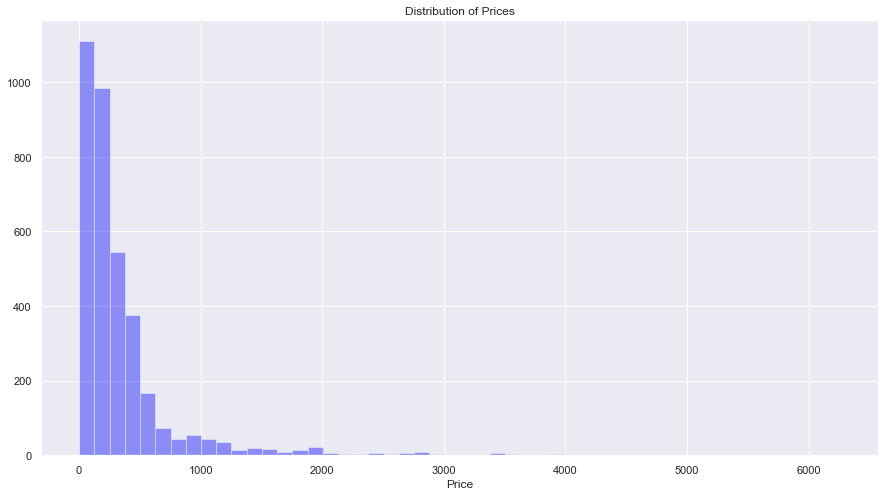

In [11]:
# Histogram of Prices

plot_function('Dist', 'Distribution of Prices', bins=50, data=df, x='Price', rotation=0, color='blue', size=(15, 8))

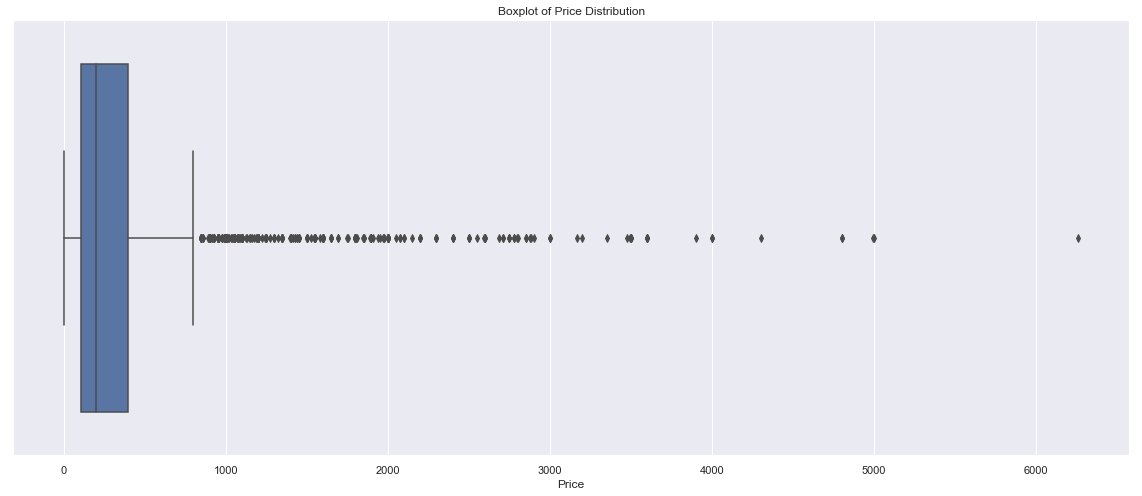

In [12]:
# Boxplot of prices

plot_function('Box', 'Boxplot of Price Distribution', data=df, x='Price', color='blue', rotation=0, size=(20, 8))

From a quick look at the Price Distribution in the dataset it looks like the majority of synths are under 1,000. That being said there area a lot of outliers ranging from around 900 all the way to 6,000 dollars!

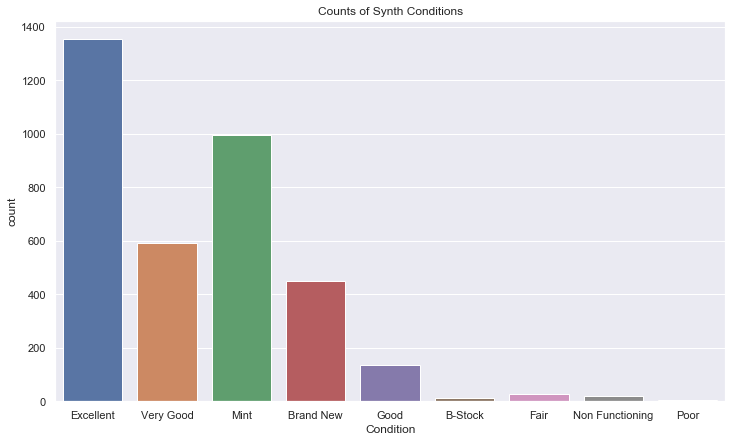

In [13]:
# Count plot of Synth Conditions

plot_function('Count', 'Counts of Synth Conditions', x='Condition', data=df)

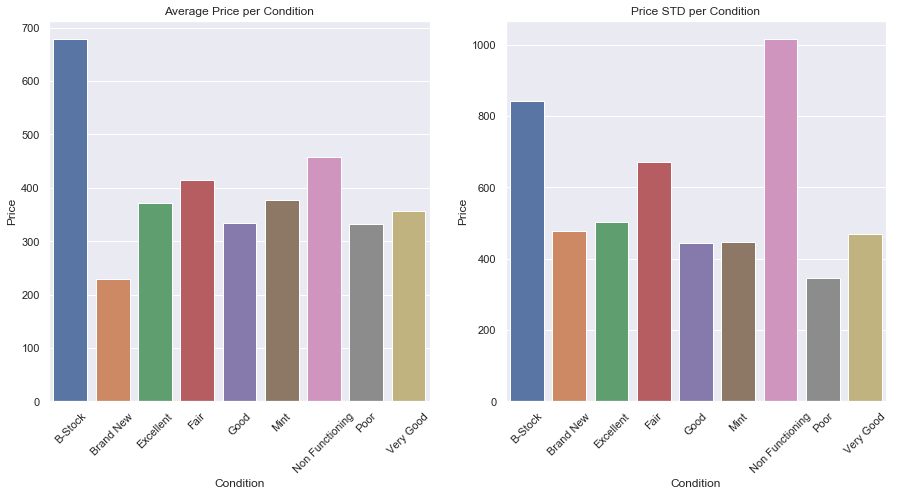

In [14]:
# Grouping by condition and plotting average price, and std to checking variance of prices per condition


average_price_condition = df.groupby('Condition')['Price'].mean().reset_index()
std_price_condition = df.groupby('Condition')['Price'].std().reset_index()


f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(7)
f.set_figwidth(15)

plt.subplot(1, 2, 1)
g = sns.barplot(x='Condition', y='Price', data=average_price_condition)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Average Price per Condition')

plt.subplot(1, 2, 2)
f = sns.barplot(x='Condition', y='Price', data=std_price_condition)
f.set_xticklabels(f.get_xticklabels(), rotation=45)
plt.title('Price STD per Condition')

plt.show()

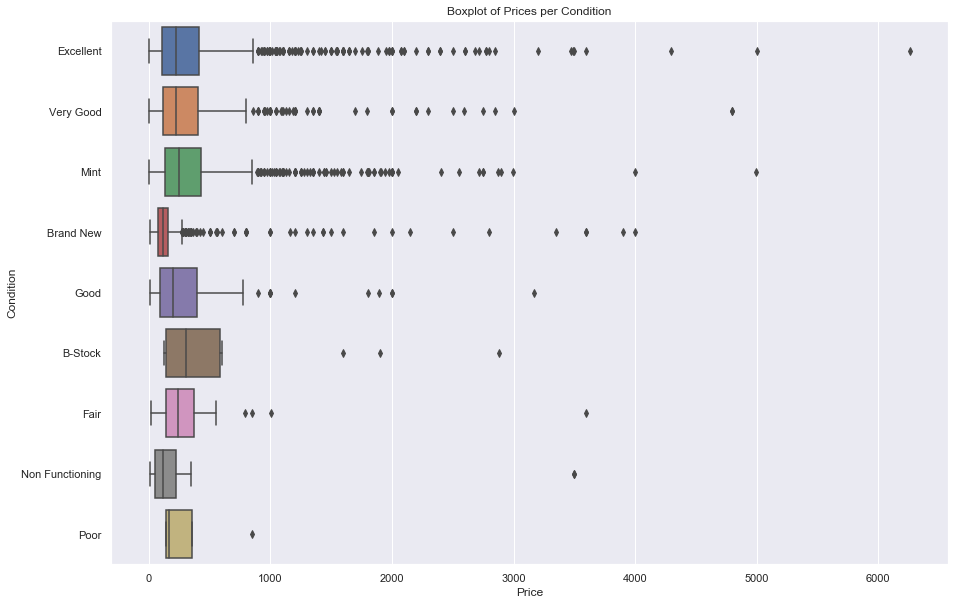

In [15]:
plot_function('Box', 'Boxplot of Prices per Condition', x='Price', y='Condition', data=df, size=(15, 10))

(0, 1000)

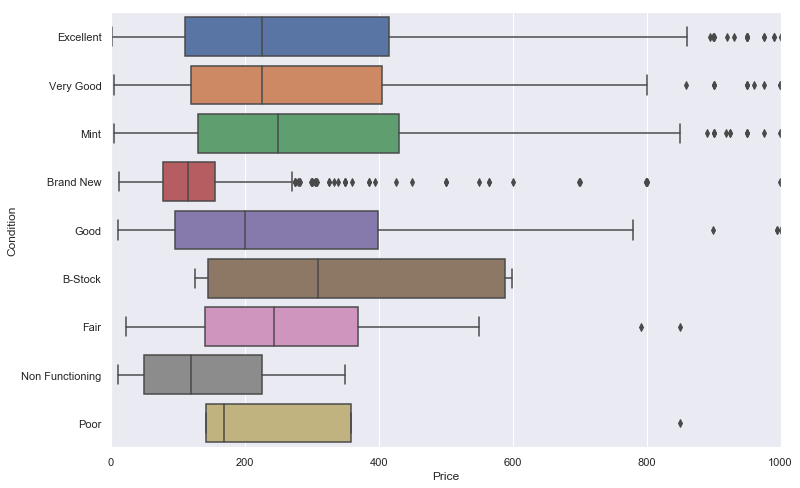

In [16]:
# Zooming in for a closer look

plt.figure(figsize=(12, 8))
sns.boxplot(x='Price', y='Condition', data=df,)
plt.xlim(0, 1000)

It looks like Excellent, Very Good, and Mint all have a very wide range of prices from $0 - $800, with many outliers, some even reaching over 4,000 dollars, which explains their high standard deviations.

Brand new has a smaller range with a majority of their prices falling between 0 and 300 dollars, however Brand new has a lot of outliers in their dataset. This must mean that there are a lot of synths or accesories under 300 dollars.

99% of B-Stock is between 150 - 600 dollars, however it has three outliers, all over 1,000 dollars. This, along with the fact that there aren't many B-Stock items sold can be the reason for it being the highest priced synth on average.

The same could be said for Non-Functioning. A majority of it's synths are between 0 and 375 dollars, however one extreme outlier at around 3,500 dollars coupled with the low amount of items sold can be responsible for it's high average price, and standard deviation.


Overall the majority of the synths sold are in great condition. As one would expect Brand New, Mint, Excellent, Very Good, and Good condition synths all have sold a lot more in total compared to Poor condition synths. The trend here is obvious that people typically prefer to purchase synths in good condition that they can use right away, instead of buying synths that might need some repairs before they can be used.

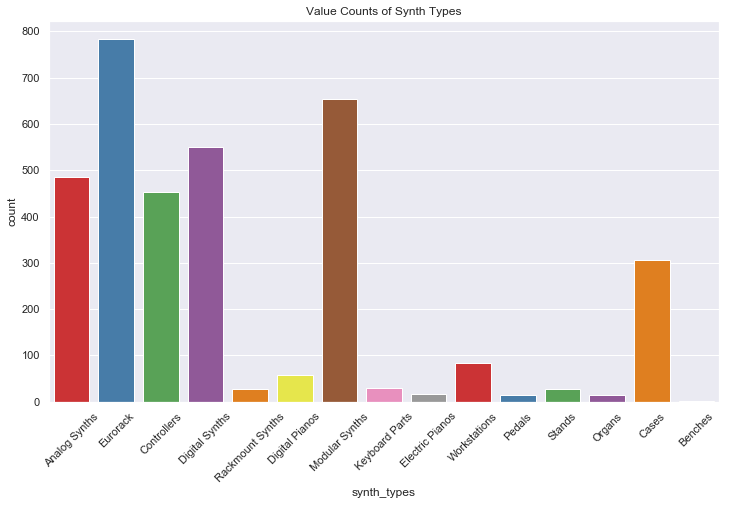

In [17]:
# Looking at synth type value counts

plot_function('Count', 'Value Counts of Synth Types', x='synth_types', data=df, rotation=45, palette='Set1')

In [18]:
df['synth_types'].value_counts()

Eurorack            783
Modular Synths      655
Digital Synths      551
Analog Synths       486
Controllers         453
Cases               307
Workstations         84
Digital Pianos       58
Keyboard Parts       30
Stands               28
Rackmount Synths     28
Electric Pianos      16
Organs               14
Pedals               14
Benches               1
Name: synth_types, dtype: int64

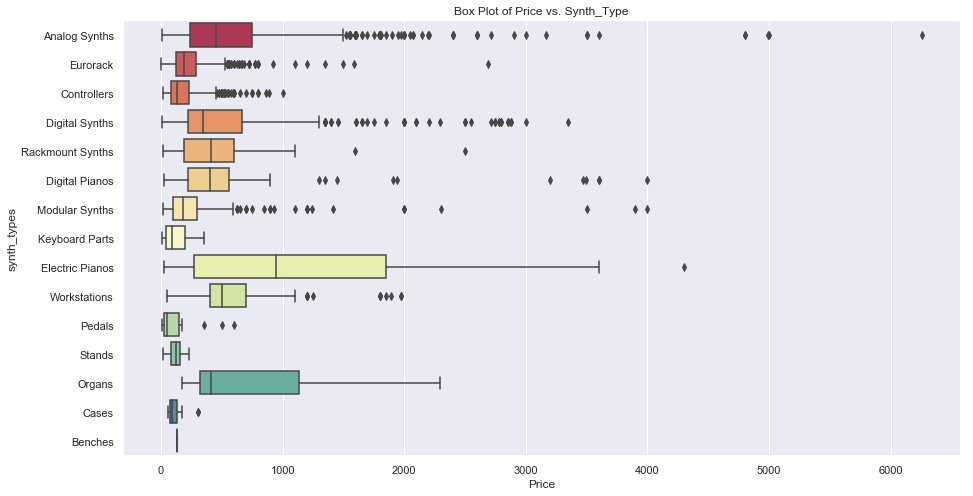

In [19]:
# Looking at prices based on synth_types with a box plot

plot_function('Box', 'Box Plot of Price vs. Synth_Type', x='Price', y='synth_types', data=df, rotation=0,
             palette='Spectral', size=(15, 8))

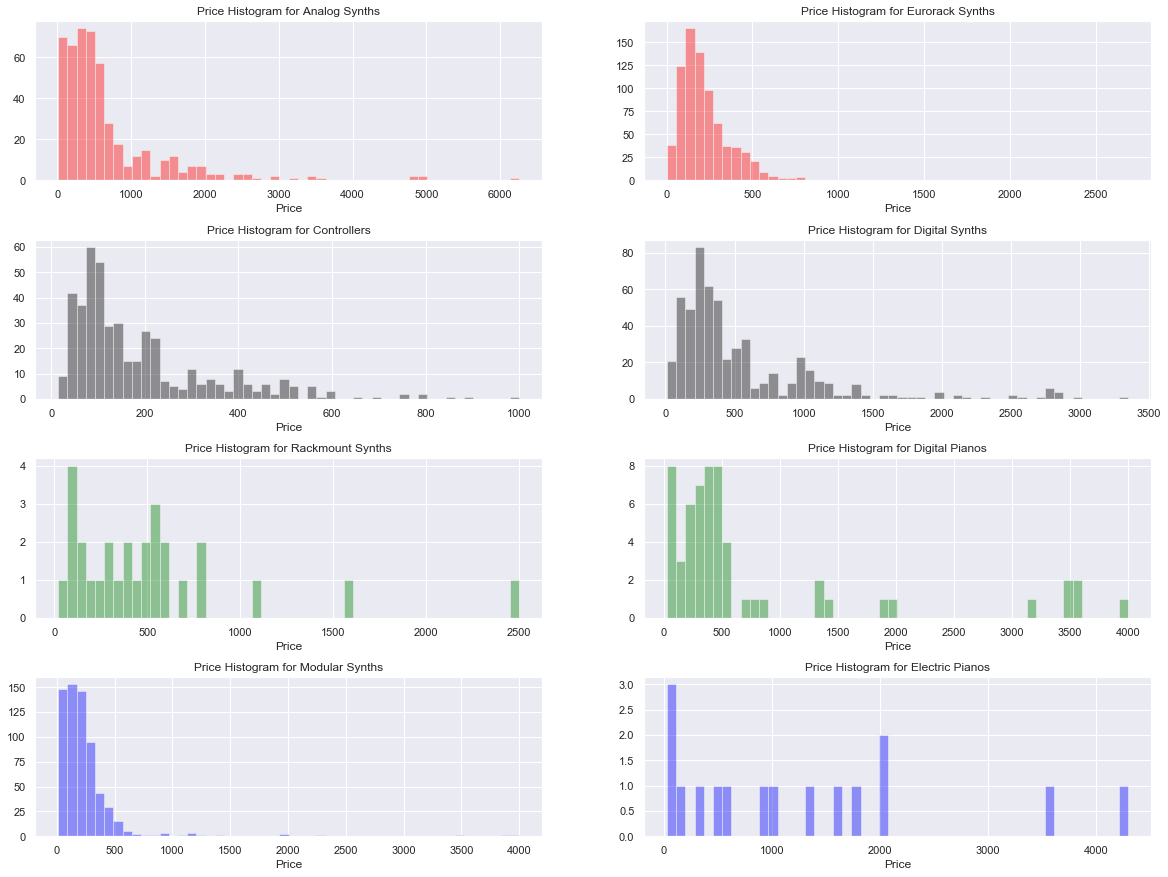

In [20]:
# Plotting the distribution of prices based on synth_types using a collection of histograms

# Creating the subplots
f, axes = plt.subplots(4, 2, sharex=False, sharey=False)
f.set_figheight(15)
f.set_figwidth(20)

# Plotting the first plot - Price for Analog synths
plt.subplot(4, 2, 1)
sns.distplot(df[df['synth_types'] == 'Analog Synths']['Price'], kde=False, color='red', bins=50)
plt.title('Price Histogram for Analog Synths')

plt.subplot(4, 2, 2)
sns.distplot(df[df['synth_types'] == 'Eurorack']['Price'], kde=False, color='red', bins=50)
plt.title('Price Histogram for Eurorack Synths')

plt.subplot(4, 2, 3)
sns.distplot(df[df['synth_types'] == 'Controllers']['Price'], kde=False, color='black', bins=50)
plt.title('Price Histogram for Controllers')

plt.subplot(4, 2, 4)
sns.distplot(df[df['synth_types'] == 'Digital Synths']['Price'], kde=False, color='black', bins=50)
plt.title('Price Histogram for Digital Synths')

plt.subplot(4, 2, 5)
sns.distplot(df[df['synth_types'] == 'Rackmount Synths']['Price'], kde=False, color='green', bins=50)
plt.title('Price Histogram for Rackmount Synths')

plt.subplot(4, 2, 6)
sns.distplot(df[df['synth_types'] == 'Digital Pianos']['Price'], kde=False, color='green', bins=50)
plt.title('Price Histogram for Digital Pianos')

plt.subplot(4, 2, 7)
sns.distplot(df[df['synth_types'] == 'Modular Synths']['Price'], kde=False, color='blue', bins=50)
plt.title('Price Histogram for Modular Synths')

plt.subplot(4, 2, 8)
sns.distplot(df[df['synth_types'] == 'Electric Pianos']['Price'], kde=False, color='blue', bins=50)
plt.title('Price Histogram for Electric Pianos')

plt.subplots_adjust(hspace=0.37)

plt.show()

The first thing I concluded from these visualizations is that the most sold synth type in this dataset is Eurorack, with Modular synths coming in second. This gives me a little insight into the rise of the Eurorack/ Modular synth trend. With it being easier than ever to create and publish music, it looks like a lot of people are investing in building their own rack/ modular setup to create their unique sound instead of buying a traditional synth.

There are some things I noticed with the boxplot above. First, I noticed the most expensive synth is an Analog synth costing more than 6,000 dollars. The second and third most expensive sold synths are also Analog synths. Analog synths range from 0 - around 1,700 dollars, however there are a lot of outliers around 2,000 dollars and up. It tells me that while there are some cheaper analog synths around, they are usually more expensive with some being extremely expensive. The majority of analog synths seem to be 500 dollars and up.


Euroracks which make up majority of sold synths in this dataset have 99% of their synths between 0 and around 500 dollars. There are a few outliers, but the majority of outliers still sit under 1,000 dollars, with the max price being around 2,700 dollars. This gives me an idea that Euroracks are pretty evenly priced in a small price window, and that most companies probably play on an even playing field when it comes to quality and price.

Controllers max out at 1,000 dollars with 99% of sales being between 0 and around 500 dollars. 50% of controllers are between 50 and 250 dollars though. Controllers look to be some of the cheaper items that sold, I imagine the more expensive controllers / outliers have some additional and special features that account for the increase in price.


The majority of Digital Synths look to be around 250 - 500 dollars, however there is somewhat of a wide range of price for Digital Synths with 99% of the data being between 0 - around 1,300 dollars. There are quite a few outliers though ranging from 1,400 - 3,500 dollars. The Price distribution shows there is a large spike from 100 - 500 dollars and then a mini spike at 1,000 dollars. I suspect there might be certain brands that focus on higher end, more expensive digital synths, or maybe there are some old school digital synths that peopleare willing to pay 1,000 dollars for.


The distribution of prices of rackmount synths looks to be wider spread than Euroracks, with the middle of the rackmount price data being higher than that of Euroracks. There are only two outliers for rackmounts, with 99% of the data being between 0 and a little over 1,000 dollars. The outliers are around 1,500 and 2,500, but the majority of rackmounts look to be around 250 - 500 dollars.


Digital pianos also are majorily around 250 - 500 dollars, with a smaller range than that of Digital synths and Rackmount synths. There are a few outliers though, and the range of outliers varies pretty largely, from around 1,400 - 4,000 dollars. This tells me that although Digital Synths are for the most part fairly inexpensive, there are probably certain models which maybe are older or made for a specific style that are the gold standard, and therefore are very expensive.


Modular synths have a very similar price distribution to Eurorack synths, which to me makes sense. One distuingishable difference though is that Modular synths has a much wider distribution of outliers, one of which is 4,000 dollars. What this shows me is that while most Modular synths are consistently priced under 500 dollars, there are some coveted modular synths which are probably similar to the more expensive digital pianos - certain models which maybe are older or made for a specific style that are the gold standard, and therefore are very expensive.


Electric Pianos have by far the largest range of prices excluding outliers in the whole dataset. 99% of the data is between o and 3,500 dollars. This tells me that although there are most likely a lot of cheap options, there are also a lot of very expensive options. This could mean that the quality of electric pianos varies greatly depending on price and perhaps brand.

In [21]:
# Creating a function to clean up the year_made row

def update_year_made(row):
    if row[:3] == '201':
        return '2010s'
    elif row[:3] == '200':
        return '2000s'
    elif row[:3] == '199':
        return '1990s'
    elif row[:3] == '198':
        return '1980s'
    elif row[:3] == '197':
        return '1970s'
    elif row[:3] == '196':
        return '1960s'

In [22]:
df['year_made'] = df['year_made'].apply(lambda x: str(x))
df['year_made'] = df['year_made'].apply(update_year_made)

In [23]:
df['year_made'].value_counts()

2010s    1771
1980s     134
2000s      76
1990s      45
1970s      25
1960s       7
Name: year_made, dtype: int64

In [24]:
# Grouping by year made to get average price based on year made

average_price_year_made = df.groupby('year_made')['Price'].mean().reset_index().sort_values('Price', ascending=False)
average_price_year_made

,year_made,Price
1,1970s,1684.610000
0,1960s,991.571429
3,1990s,612.538667
2,1980s,605.858209
4,2000s,436.635395
5,2010s,342.957228


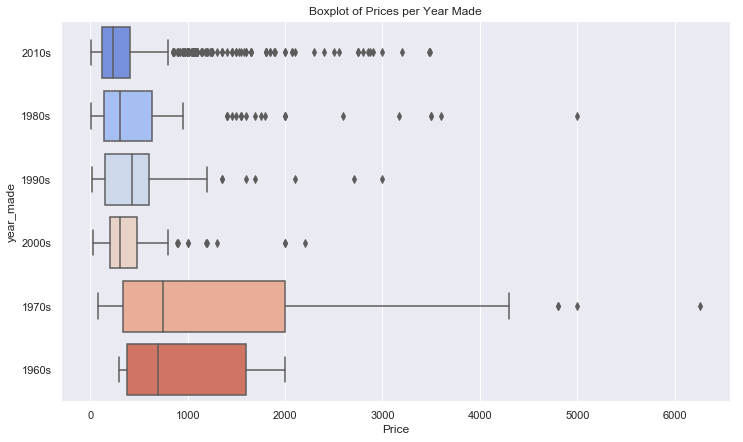

In [25]:
# Creating a boxplot to look at the range of the prices by year

plot_function('Box', 'Boxplot of Prices per Year Made', x='Price', y='year_made', data=df, palette='coolwarm')

In [26]:
# Creating a Pivot table to view the synth_types sold based on year_made

synth_types_year_made = df.groupby(['year_made', 'synth_types'])['Price'].count().reset_index()
synth_types_year_made = synth_types_year_made.pivot(index='year_made', columns='synth_types', values='Price')
synth_types_year_made.drop(['Cases', 'Pedals', 'Stands'], axis=1, inplace=True)
synth_types_year_made

synth_types,Analog Synths,Controllers,Digital Pianos,Digital Synths,Electric Pianos,Eurorack,Keyboard Parts,Modular Synths,Organs,Rackmount Synths,Workstations
year_made,,,,,,,,,,,
1960s,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN
1970s,9.0,2.0,NaN,NaN,4.0,NaN,2.0,5.0,1.0,NaN,NaN
1980s,39.0,3.0,NaN,78.0,NaN,NaN,6.0,NaN,NaN,3.0,NaN
1990s,2.0,4.0,NaN,23.0,NaN,NaN,3.0,NaN,NaN,8.0,5.0
2000s,4.0,10.0,NaN,40.0,3.0,NaN,1.0,2.0,2.0,5.0,7.0
2010s,319.0,323.0,26.0,264.0,1.0,397.0,NaN,368.0,2.0,1.0,40.0


In [27]:
# Creating a Pivot table to view the Conditions for the synths sold based on year_made

condition_year_made = df.groupby(['year_made', 'Condition'])['Price'].count().reset_index()
condition_year_made = condition_year_made.pivot(index='year_made', columns='Condition', values='Price')
condition_year_made

Condition,Brand New,Excellent,Fair,Good,Mint,Non Functioning,Poor,Very Good
year_made,,,,,,,,
1960s,NaN,3.0,NaN,2.0,NaN,NaN,NaN,2.0
1970s,NaN,9.0,NaN,4.0,NaN,1.0,NaN,11.0
1980s,NaN,45.0,3.0,18.0,10.0,5.0,1.0,52.0
1990s,NaN,23.0,3.0,1.0,2.0,NaN,1.0,15.0
2000s,NaN,34.0,2.0,8.0,4.0,NaN,NaN,28.0
2010s,2.0,807.0,9.0,40.0,632.0,6.0,NaN,275.0


What I can conclude here is that a majority of the sold synths in this data set are very new synths that were made in the last decade. It's not entirely surprising as a majority of synths sold in the dataset are Euroracks, and modular synths which a majority of those are newer models made in the 2010s - in fact not a single Eurorack synth that was sold was made outside of 2010.

1980s synths are the second most sold synths in the dataset by decade - which also is not surprising at all since many people worship 80s synths - and since it was the era of time when synthwave and synthpop music were very big.


What was interesting is that the 2010s had the lowest average price out of any decade. The two main factors I imagine for this being the case is there are a lot more affordable synths available now, and older synths that are in better condition tend to be much rarer, so therefore tend to be more expensive. A big reason for this I belive is due to the fact that there is very little data for the other decades in the data set compared to the 2010s, since the 2010s account for about 86% of the data for known year_made values in this dataset.

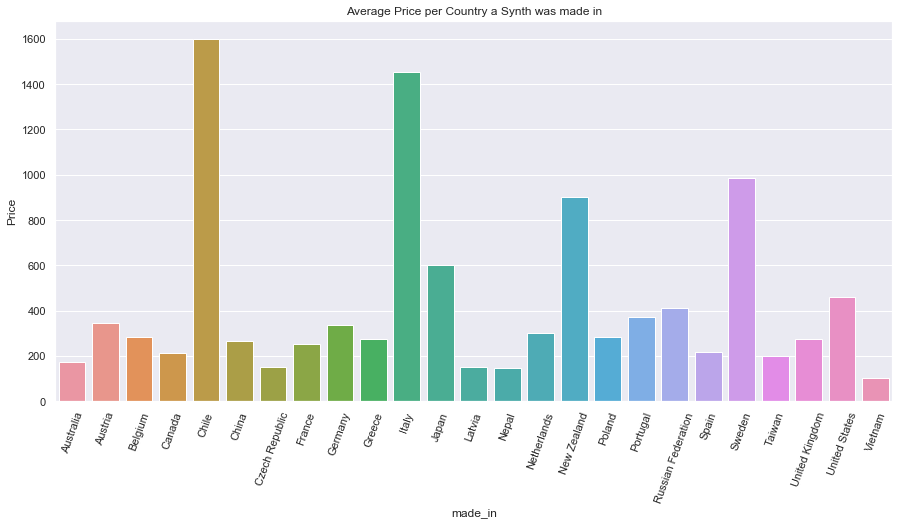

In [28]:
# Grouping by made_in to see if there are any interesting trends

price_made_in = df.groupby('made_in')['Price'].mean().reset_index()
plot_function('Bar', 'Average Price per Country a Synth was made in', x='made_in', y='Price',
             data=price_made_in, size=(15, 7), rotation=70)

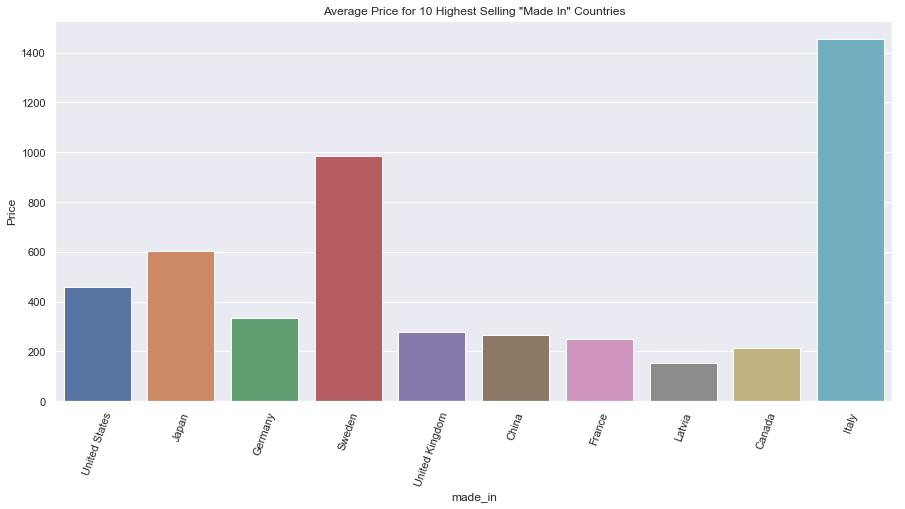

,made_in,synths_sold,Price
0,United States,534,460.490494
1,Japan,163,602.807870
2,Germany,94,335.386211
3,Sweden,74,984.439459
4,United Kingdom,68,276.150882
5,China,60,266.744918
6,France,50,251.550000
7,Latvia,49,151.699184
8,Canada,26,214.135769
9,Italy,10,1455.288000


In [29]:
# Looking at the counts of synth sold based on where they were made

made_in_count = df.groupby('made_in')['synth_types'].count().reset_index()

# Merging made_in_count, and price_made_in and plotting the mean price for the top 10 countries 
#with the most sold synths
top_ten_made_in = made_in_count.merge(price_made_in)

# Renaming synth_types to synths_sold, then sorting the values of the new dataframe by synths_sold in descending order, 
# and then taking only the top 10 values for synths sold.
top_ten_made_in = top_ten_made_in.rename(columns={'synth_types': 'synths_sold'})
top_ten_made_in = top_ten_made_in.sort_values('synths_sold', ascending=False)[:10].reset_index(drop=True)

plot_function('Bar', 'Average Price for 10 Highest Selling "Made In" Countries', x='made_in', y='Price',
             data=top_ten_made_in, rotation=70, size=(15, 7))

top_ten_made_in

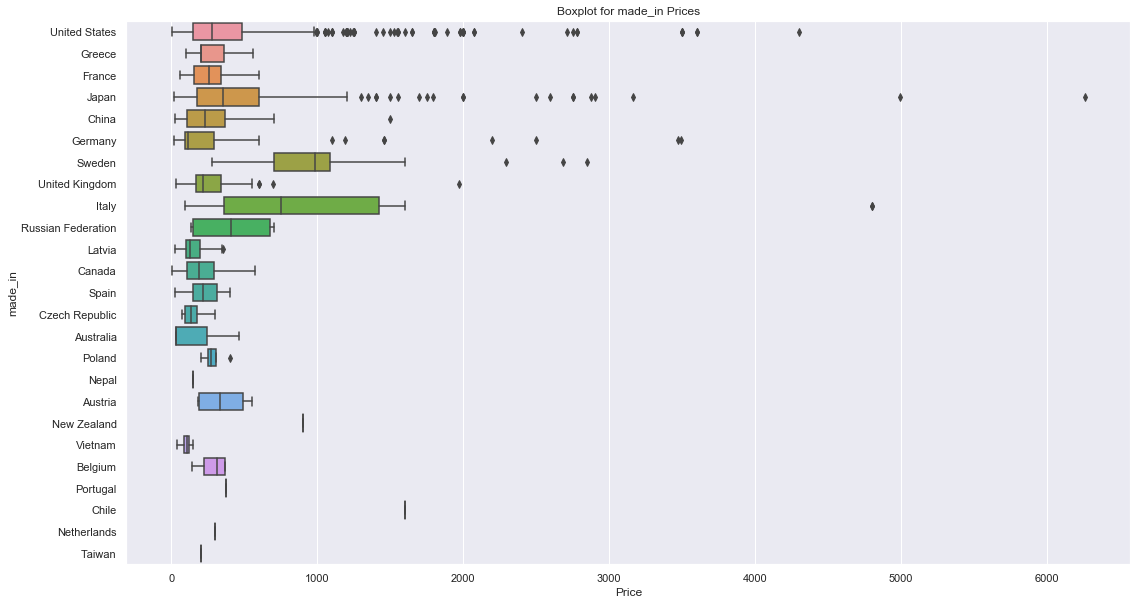

In [30]:
# Plotting a boxplot to look at the distributions

plot_function('Box', 'Boxplot for made_in Prices', x='Price', y='made_in', data=df, size=(18, 10))

In [31]:
made_in_synth_types = df.groupby(['made_in', 'synth_types'])['Price'].count().reset_index()
made_in_synth_types = pd.pivot(index='made_in', columns='synth_types', values='Price', data=made_in_synth_types)

made_in_synth_types

synth_types,Analog Synths,Cases,Controllers,Digital Pianos,Digital Synths,Electric Pianos,Eurorack,Keyboard Parts,Modular Synths,Organs,Pedals,Rackmount Synths,Stands,Workstations
made_in,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,3.0,NaN,NaN,NaN,15.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,22.0,NaN,16.0,3.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
France,2.0,NaN,1.0,NaN,2.0,NaN,37.0,NaN,5.0,NaN,NaN,NaN,NaN,3.0
Germany,3.0,NaN,13.0,2.0,16.0,1.0,1.0,NaN,56.0,NaN,1.0,NaN,1.0,NaN


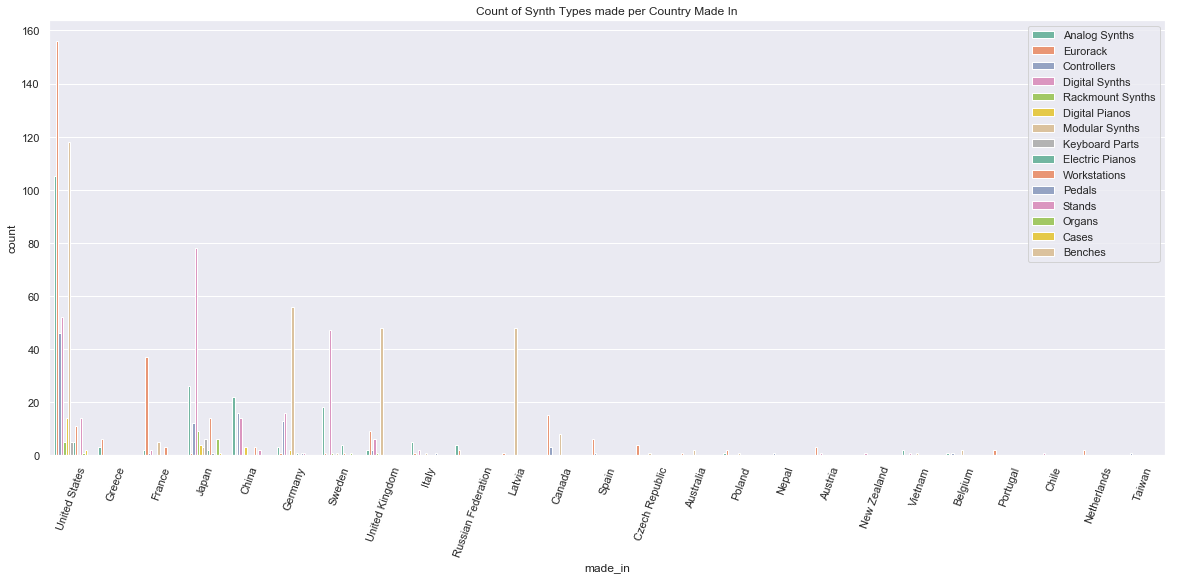

In [40]:
plt.figure(figsize=(20, 8))
g = sns.countplot(x='made_in', data=df, hue='synth_types', palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.legend(loc='upper right')
plt.title('Count of Synth Types made per Country Made In')
plt.show()

It looks like the US, and Japan have the largest diversity when it comes to synth type, with both Countries having sold all but one synth type.

Italy has the highest average synth price, and the largest standard deviation, with one high priced outlier. This tells me that although they produce a lot of higher priced synths, the prices for Italian synths vary greatly, and I also believe the outlier is having a big impact on the average synth price. That coupled with the fact that there aren't many Italian synths listed in this dataset make it hard to measure if Italian synths are on average the most expensive.

Swedish synths on the other hand have a very similar range to Italian synths, except they appear to have less cheaper priced synths. With a lot more Swedish synths labeled in this dataset, it looks like the higher priced average for Swedish synths is an accurate portrayal of Swedish synth price.

Japan and the US have very similar price distributions, with Japan having a slightly higher price for the majority of their synths sold, and a higher average price. The US has a lot more outliers than Japan though, so although it does seem on average Japanese synths are slightly more expensive than American synths, there are some American synths that are extremely expensive compare to the average Japanese synth.

In [34]:
# Removing all non synth types

non_synths = ['Cases', 'Keyboard Parts', 'Stands', 'Pedals', 'Benches']
type_of_synth = [x for x in df.synth_types.value_counts().index if x not in non_synths]

synths_only_df = df[df['synth_types'].isin(type_of_synth)]


# Finding top ten most sold synth brands

top_ten = synths_only_df['Brand'].value_counts()[:10].index
top_ten_brands = synths_only_df[synths_only_df['Brand'].isin(top_ten)].reset_index(drop=True)
top_ten_brands.head()

,Brand,Condition,Description,Model,synth_types,Price,year_made,made_in,n_keys,urls
0,Roland,Excellent,a previous owner added some custom knobs - see...,Boutique Series SE-02 Analog Synthesizer,Analog Synths,285.0,2010s,NaN,0,https://reverb.com/item/33250949-roland-boutiq...
1,Moog,Very Good,Unit is in great condition. A couple of blemis...,Sub 37 Tribute Edition,Analog Synths,975.0,2010s,United States,37 Keys,https://reverb.com/item/33250934-moog-sub-37-t...
2,Korg,Mint,"Mint condition, barely used it a month. Ships...",Monologue Monophonic Analog Synthesizer,Analog Synths,249.0,2010s,NaN,25 Keys,https://reverb.com/item/33250747-korg-monologu...
3,Korg,Very Good,This Korg Microsampler is in great shape. On...,MS1 MicroSampler,Digital Synths,285.0,2010s,NaN,37 Keys,https://reverb.com/item/33250703-korg-ms1-micr...
4,Korg,Excellent,Korg Minilogue 4-Voice Polyphonic Analog Synth...,Minilogue 4-Voice Polyphonic Analog Synthesizer,Analog Synths,370.0,2010s,NaN,37 Keys,https://reverb.com/item/33250415-korg-minilogu...


In [35]:
top_ten_brands['Brand'].value_counts()

Korg                   280
Roland                 189
Make Noise             154
Arturia                128
Mutable Instruments    127
Intellijel             117
Yamaha                 106
Moog                   100
Behringer               96
Akai                    77
Name: Brand, dtype: int64

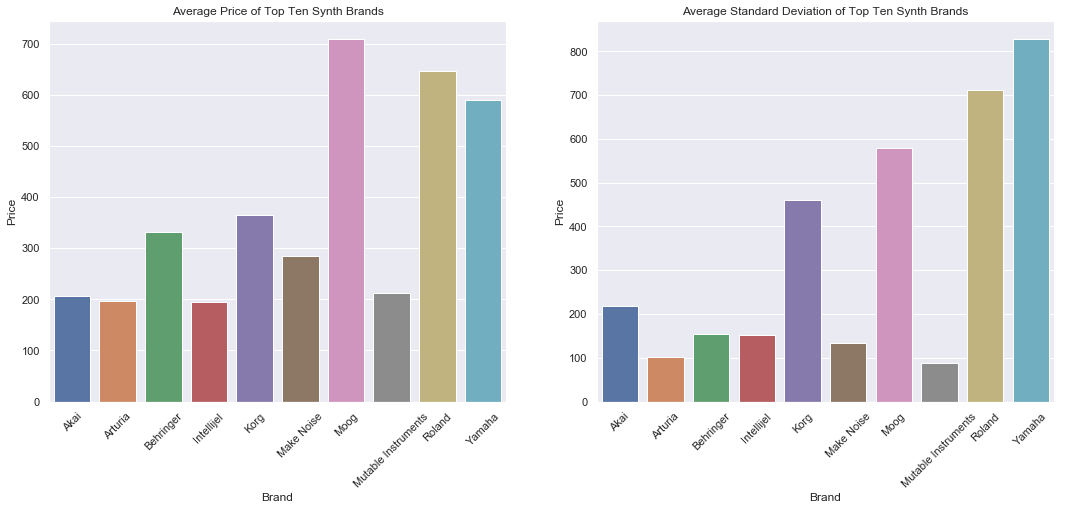

In [47]:
# Grouping by top 10 synths to look at average price per brand
# ttb stands for top ten brands

ttb_average_price = top_ten_brands.groupby('Brand')['Price'].mean().reset_index()

# Grouping by top 10 synths to look at the standard deviation in price for each brand

ttb_price_std = top_ten_brands.groupby('Brand')['Price'].std().reset_index()

# Plotting out the average price and standard deviation for each of the top 10 brands
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figwidth(18)
f.set_figheight(7)

g = sns.barplot(x='Brand', y='Price', data=ttb_average_price, ax=axes[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
axes[0].set_title('Average Price of Top Ten Synth Brands')

f = sns.barplot(x='Brand', y='Price', data=ttb_price_std, ax=axes[1])
f.set_xticklabels(g.get_xticklabels(), rotation=45)
axes[1].set_title('Average Standard Deviation of Top Ten Synth Brands')

plt.show()

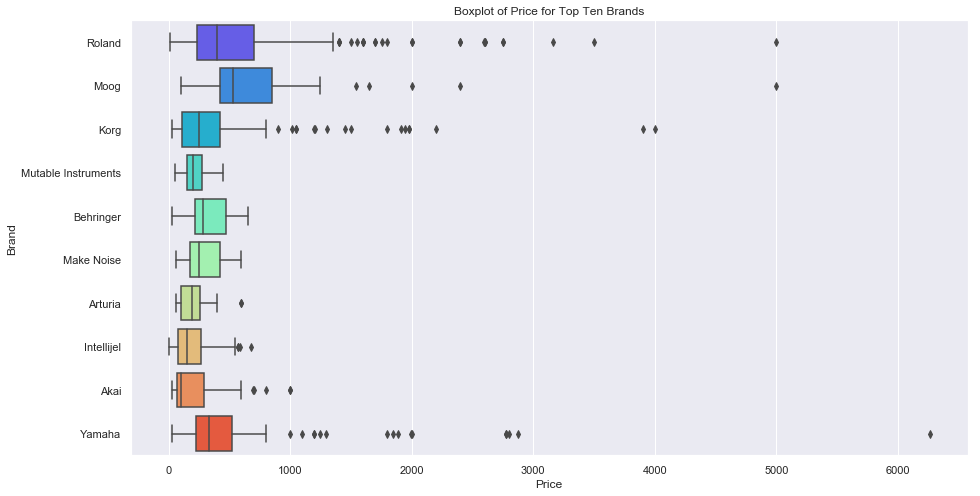

In [37]:
# Looking at Boxplot distributions of Price for top 10 Brands

plot_function('Box', 'Boxplot of Price for Top Ten Brands', x='Price', y='Brand', data=top_ten_brands, size=(15, 8),
             rotation=0, palette='rainbow')

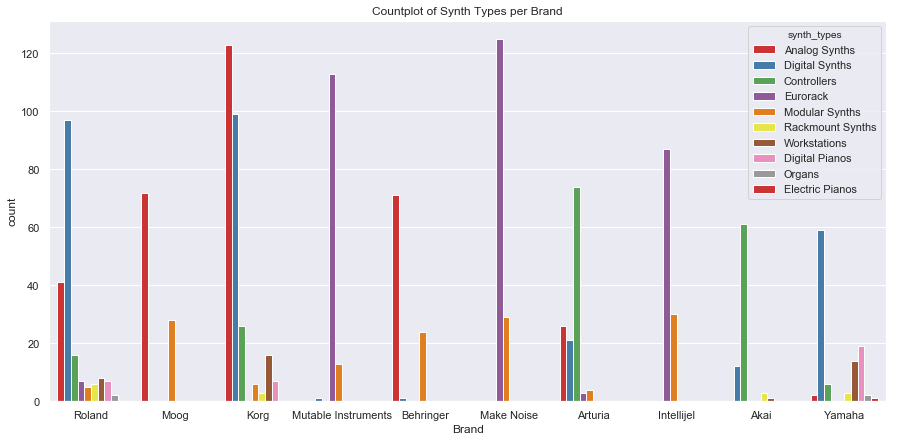

In [38]:
plot_function('Count', 'Countplot of Synth Types per Brand', x='Brand', data=top_ten_brands, hue='synth_types',
             size=(15, 7), rotation=0, palette='Set1')

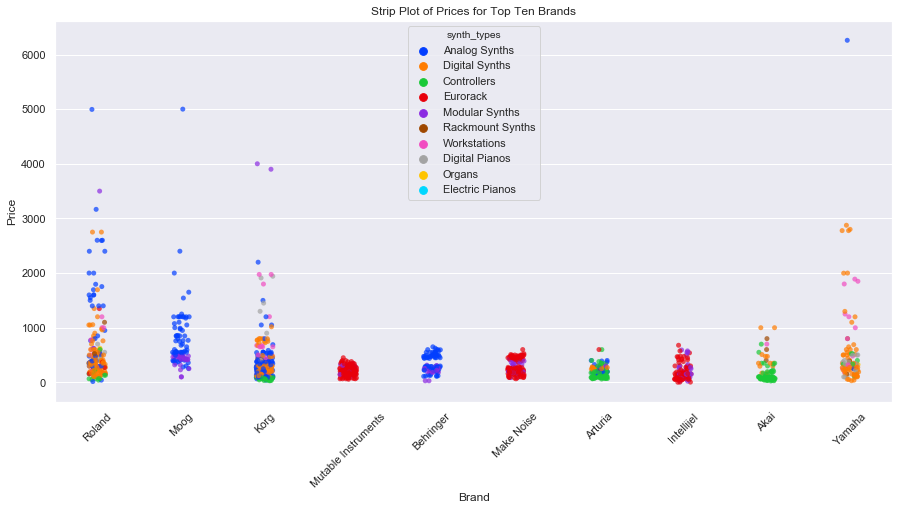

In [39]:
plot_function('Strip', 'Strip Plot of Prices for Top Ten Brands', x='Brand', y='Price', data=top_ten_brands,
             alpha=0.7, size=(15, 7), rotation=45, hue='synth_types', palette='bright')

Moog is the highest priced brand on average, and while the spread of Moog's Price data is large, it has the highest price for a majority of it's synths out of all brands.

Roland and Yamaha are the second and third most expensive companies. Roland, Moog, and Yamaha have some extreme outliers above 5,000 dollars! All three brands have a majority of their sold synths priced between around 0 to around 1,300 dollars. This tells me that all 3 of these companies are considered high end, but also drive sales and brand awareness by producing cheaper products that are more affordable. 

It's interesting to see how different the top 3 priced brands are in terms of the products they produce. Moog's brand consists mostly of 250-1,200 dollar analog or modular synths. Roland seems to be the most diverse which to me explains the wide range of their Price distribution. Roland produces everything from Analog, to Digital synths, from Rackmounts to Pedals, and Digital Pianos. It seems like nothing is off-limits production wise at Roland. One thing to note is that their Analog Synths are by far their most expensive items. Yamaha's core business seems to be Digital Synths. This is not surprising as they have a variety of Digital synths that are cult classics. While they do produce some Digital and Electric Pianos, and some Analog synths, it's clear their bread and butter is Digital Synths. 

Looking at the company with the most sold synths - Korg - I can see something interesting based off of the brands Moog, Roland and Yamaha. It seems that Korg offers a slightly cheaper alternative to the former brands, while also offering a diversity of synth types. Korg has a lower price range than that of the top 3 most expensive brands, with a majority of Korg's products being between about 0 - 900 dollars. Korg seems to have positioned itself as a Brand that produces quality synths at an affordable price range of 150 - 500 dollars. While Roland has also seemed to position itself as a similar brand, it appears that Roland synths are more expensive than Korg, and on average Roland synthesizers / keyboards appear to be 200 dollars more expensive than Korg. Roland is the second highest selling brand in the data set, but when looking at the top ten brands, and excluding products like 'Cases', 'Stands', 'Pedals', 'Keyboard Parts', and 'Benches' from the data set, Korg has sold almost 100 more products than Roland. What's interesting is that Korg has sold the most Analog synths by far, selling around 40 more than Moog which has sold the second highest amount of Analog synths. With affordable Analog synths available, and Analog Synths being trendy it's pretty clear why Korg have sold the most synths in this dataset.

From my visualizations I can distinguish three very similar companies who have tapped into the same niche and found success. Mutable Instruments, Make Noise, and Intellijel all have a specific business model of selling Eurorack, and Modular synths for an affordable price - usually between 0 and 500 dollars. Mutable Instruments looks to be the least expensive of the three companies, however they all sit within that 0 to 500 dollar range. This tells me that all three companies are focused on positioning themselves as DIY (modular/ eurorack) synth companies where you can expect their products to be fairly affordable, within a specific price window. It seems rare that they have products that are extremely expensive and over 1,000 dollars.

The last company I want to look at is Behringer. I know that the majority of their products are clones of classic synths, and I was surprised to see how they matched up against companies that produced the originals for the clones they make. For example Behringer has sold more Analog synths than Roland in this dataset, and Roland clones are a large part of Behringer's product line. Their price distribution is also intersting - it is somewhat comparable to the modular / eurorack companies mentioned above, although slightly more expensive - however there are no crazy outlier prices. It's safe to say that Behringer has stuck to it's ethos of making Analog synths, and modular synths that are affordable, and not extremely expensive in price.